# Assignment: KNN - ZOO
Implement a KNN model to classify the animals into categorie


In [9]:
import pandas as pd

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [13]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [14]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


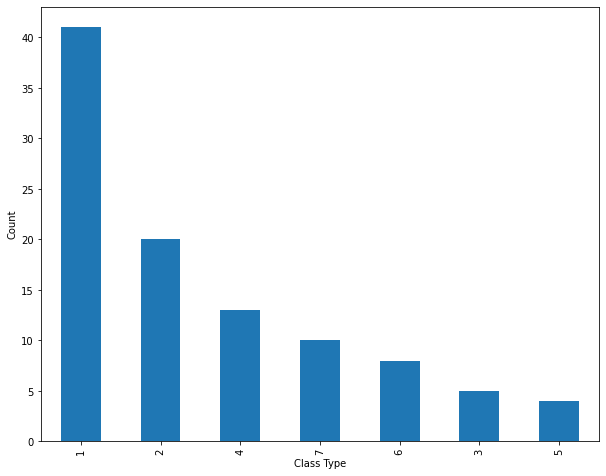

In [17]:
plt.figure(figsize=(10,8));
df.type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

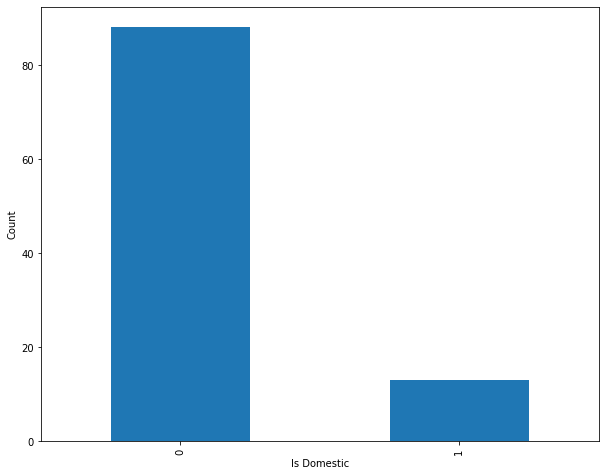

In [18]:
plt.figure(figsize=(10,8));
df.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

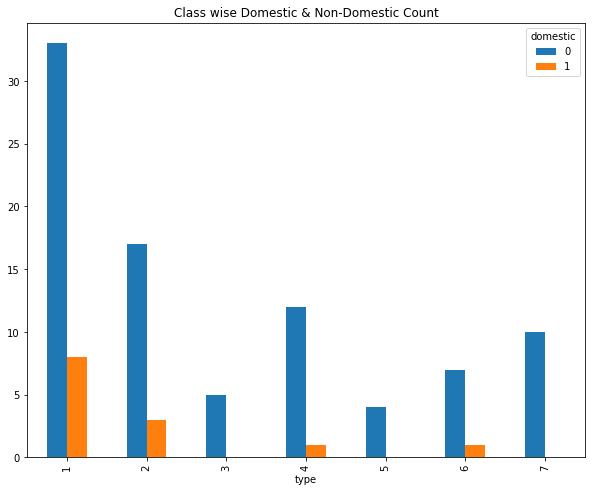

In [19]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df.type, df.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [20]:
df.milk.value_counts()


0    60
1    41
Name: milk, dtype: int64

In [22]:
pd.crosstab(df.type, df.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


In [23]:
df.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

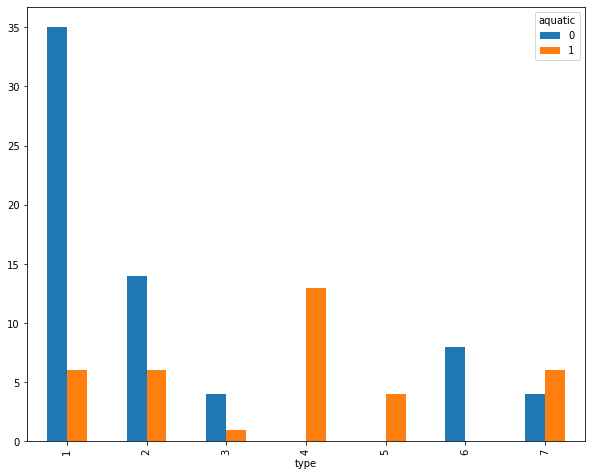

In [24]:
pd.crosstab(df.type, df.aquatic).plot(kind="bar", figsize=(10, 8));

<AxesSubplot:xlabel='type'>

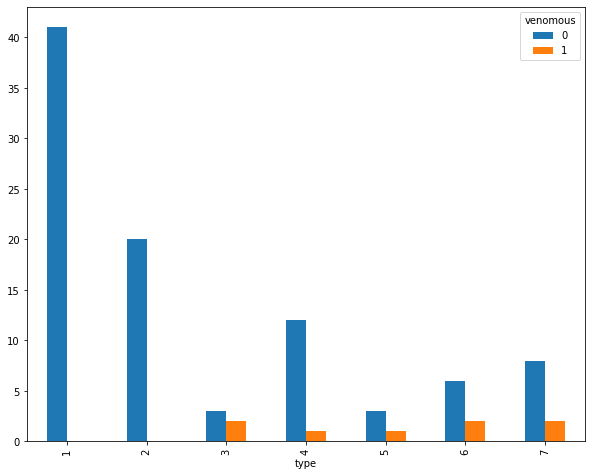

In [25]:
pd.crosstab(df.type, df.venomous).plot(kind="bar", figsize=(10, 8))

In [26]:
df["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [27]:
df = df.drop('animal name', axis = 1)
df.dropna(inplace = True)

In [28]:
print(df.apply(lambda col: col.unique()))

hair                       [1, 0]
feathers                   [0, 1]
eggs                       [0, 1]
milk                       [1, 0]
airborne                   [0, 1]
aquatic                    [0, 1]
predator                   [1, 0]
toothed                    [1, 0]
backbone                   [1, 0]
breathes                   [1, 0]
venomous                   [0, 1]
fins                       [0, 1]
legs           [4, 0, 2, 6, 8, 5]
tail                       [0, 1]
domestic                   [0, 1]
catsize                    [1, 0]
type        [1, 4, 2, 7, 6, 5, 3]
dtype: object


# Features and Target

In [29]:
X =  df.drop('type',axis=1).values
y = df["type"]

In [30]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [31]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Model Creation

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

# Model Validation

In [35]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

# KFold testing

In [37]:
from sklearn.model_selection import KFold, cross_val_score

In [38]:
estimator = KNeighborsClassifier()
result = cross_val_score(estimator,X,y,cv=KFold(n_splits=10))

In [39]:
result

array([1. , 1. , 0.8, 1. , 1. , 0.9, 1. , 0.8, 0.7, 0.9])

In [40]:
result.min(),result.max()

(0.7, 1.0)

In [41]:
result.std()

0.1044030650891055

In [42]:
result.mean()

0.9099999999999999

# Grid serch

In [43]:
from sklearn.model_selection import GridSearchCV


In [44]:
grid = GridSearchCV(model,param_grid={"n_neighbors":[3,4,5,6,7,9,11,13,15,17]},cv=KFold(10))

grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 9, 11, 13, 15, 17]})

In [45]:
grid.best_score_,grid.best_params_

(0.93, {'n_neighbors': 3})

In [46]:
est = []

for i in range(1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    est.append(model)

In [47]:
score = []

for i in range(len(est)):
    est[i].fit(X_train,y_train)
    sc = est[i].score(X_test,y_test)
    score.append(sc)

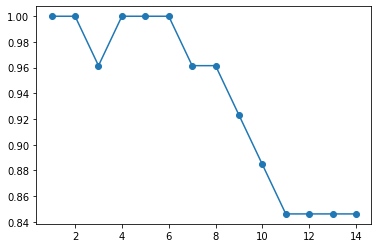

In [48]:
import matplotlib.pyplot as plt
plt.scatter(range(1,15),score)
plt.plot(range(1,15),score)

In [49]:
f_model = KNeighborsClassifier(n_neighbors=3)

In [50]:
f_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred1 = f_model.predict(X_test)
confusion_matrix(y_test,y_pred1)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9615384615384616

#### We got 96% accuracy for KNN model 